# Model selection

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler


#NN parts
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import scipy as sp

## Load data

In [2]:
# leer data
data_m = pd.read_csv('../../data/processed/data_m_v2.csv')
data_f = pd.read_csv('../../data/processed/data_f_v2.csv')
data_m

,edad,peso,talla,per_brazo_rel,per_brazo_ten,per_antebrazo,per_torax,per_cintura,per_cadera,per_muslo_max,per_muslo_medial,per_pantorrilla,masa_piel,masa_adiposa,masa_muscular,masa_residual,masa_osea,peso_porcentaje
0,-1.036390,-1.129647,-1.041523,-0.245085,-0.364953,-0.791100,-0.661568,-1.015423,-1.182268,-1.117874,-1.535150,-1.224345,0.052860,0.253409,0.478151,0.105383,0.110197,1.016963
1,-0.425749,-1.106688,0.645564,-1.516202,-2.004565,-1.668563,-2.015216,-1.005378,-0.498441,-1.117874,-1.422207,-0.332794,0.054644,0.352585,0.367398,0.092668,0.132705,1.028239
2,0.033609,1.495342,-1.424952,3.133412,2.974995,2.718753,1.299323,1.355101,1.642233,2.023883,2.033875,1.681451,0.039291,0.366312,0.388463,0.107386,0.098548,1.065902
3,-0.378883,0.576979,-0.581408,0.357024,0.788847,0.757365,0.413759,0.551533,0.675956,0.750198,0.633371,1.483329,0.044419,0.311746,0.418139,0.109605,0.116092,1.038759
4,0.297577,-0.326079,0.338821,0.055969,0.667394,0.602518,-0.092277,-0.000919,-0.394381,-0.948049,-0.518656,-0.762059,0.050664,0.228280,0.482941,0.125027,0.113088,1.013803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,-1.340331,-2.178113,-0.734780,-1.783806,-1.609843,-1.823410,-2.154376,-2.150461,-2.371532,-2.285419,-2.619411,-2.776305,0.063539,0.240454,0.450196,0.104182,0.141629,0.974093
149,-0.919913,-1.091382,-1.041523,-0.010932,-0.243501,-0.326561,-0.408550,-0.854709,-1.122805,-0.948049,-0.902665,-1.158304,0.051798,0.237287,0.494874,0.108401,0.107640,1.033369
150,0.968523,0.148409,-0.734780,-0.077832,0.120857,0.137979,0.666777,0.551533,-0.290320,-0.098926,0.249362,-0.002590,0.048524,0.204786,0.502350,0.130972,0.113367,0.982827
151,1.273154,1.495342,-1.194895,1.795393,1.760468,1.531597,1.742105,2.048177,1.478709,1.068619,0.994792,1.549370,0.041431,0.290252,0.429413,0.127518,0.111386,1.017612


## add features

## Model

In [3]:
x_columns = data_m.columns.drop(['masa_piel', 'masa_adiposa', 'masa_muscular', 'masa_residual',
       'masa_osea','peso_porcentaje'])
y_columns = ['masa_piel', 'masa_adiposa', 'masa_muscular', 'masa_residual',
       'masa_osea']

X_m = data_m[x_columns].values
y_m = data_m[y_columns].values

X_f = data_f[x_columns].values
y_f = data_f[y_columns].values


In [4]:
x_columns

Index(['edad', 'peso', 'talla', 'per_brazo_rel', 'per_brazo_ten',
       'per_antebrazo', 'per_torax', 'per_cintura', 'per_cadera',
       'per_muslo_max', 'per_muslo_medial', 'per_pantorrilla'],
      dtype='object')

## split data 

In [5]:
# Create train/test
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(    
    X_m, y_m, test_size=0.25, random_state=42)

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(    
    X_f, y_f, test_size=0.25, random_state=42)

## Model

### masc

In [118]:
# Build the neural network
model = Sequential()

model.add(Dense(100, input_dim=X_m.shape[1], activation='relu',kernel_initializer='he_uniform')) #input + hidden layer 1
#model.add(Dense(50, activation='relu',kernel_initializer='random_normal')) #hidden layer 2
model.add(Dense(50, activation='relu',kernel_initializer='he_uniform')) #hidden layer 3
model.add(Dense(y_m.shape[1],activation='linear',kernel_initializer='he_uniform')) #output ,activation='softmax'
model.compile(loss='mean_squared_error', optimizer='adam')  #,metrics =['RootMeanSquaredError']


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-8, 
                        patience=5, verbose=2, mode='auto',
                       restore_best_weights=True)

model.fit(x_train_m,y_train_m,validation_data=(x_test_m,y_test_m),
       callbacks=None, verbose=2,epochs=500)  #print the result and train. callbacks=[monitor],

Epoch 1/500
4/4 - 1s - loss: 0.6375 - val_loss: 0.4955
Epoch 2/500
4/4 - 0s - loss: 0.2530 - val_loss: 0.2718
Epoch 3/500
4/4 - 0s - loss: 0.1285 - val_loss: 0.1893
Epoch 4/500
4/4 - 0s - loss: 0.0955 - val_loss: 0.1630
Epoch 5/500
4/4 - 0s - loss: 0.0851 - val_loss: 0.1556
Epoch 6/500
4/4 - 0s - loss: 0.0711 - val_loss: 0.1405
Epoch 7/500
4/4 - 0s - loss: 0.0566 - val_loss: 0.1235
Epoch 8/500
4/4 - 0s - loss: 0.0432 - val_loss: 0.1129
Epoch 9/500
4/4 - 0s - loss: 0.0361 - val_loss: 0.1095
Epoch 10/500
4/4 - 0s - loss: 0.0310 - val_loss: 0.1057
Epoch 11/500
4/4 - 1s - loss: 0.0273 - val_loss: 0.1018
Epoch 12/500
4/4 - 0s - loss: 0.0242 - val_loss: 0.0982
Epoch 13/500
4/4 - 0s - loss: 0.0214 - val_loss: 0.0923
Epoch 14/500
4/4 - 0s - loss: 0.0193 - val_loss: 0.0891
Epoch 15/500
4/4 - 0s - loss: 0.0174 - val_loss: 0.0846
Epoch 16/500
4/4 - 0s - loss: 0.0160 - val_loss: 0.0801
Epoch 17/500
4/4 - 0s - loss: 0.0147 - val_loss: 0.0801
Epoch 18/500
4/4 - 0s - loss: 0.0137 - val_loss: 0.0784
E

In [119]:
# Predict
y_pred = model.predict(x_test_m)
y_pred.sum(axis=1)

array([ 0.94398916,  1.2134261 ,  0.8631966 ,  0.91770875,  3.149527  ,
        0.87537724,  0.9888912 ,  1.7782344 ,  1.0213243 ,  1.0730685 ,
        0.9569176 ,  1.0261854 ,  0.5335627 ,  1.0707364 ,  0.7278164 ,
       -0.16745873,  1.00409   ,  1.3435745 ,  0.9942699 ,  0.93029004,
        1.1481111 ,  0.6631677 ,  1.0572973 ,  1.1437964 ,  0.52740604,
        1.0582392 ,  0.69796056,  0.98473424, -0.17521101,  0.93029004,
        0.8687084 ,  0.95435596,  0.9100031 ,  0.8699899 ,  0.7043387 ,
        0.6995307 ,  1.028133  ,  1.1281248 ,  1.02504   ], dtype=float32)

masa_piel
R2 = -80.8072 , MSE = 0.0019 and MAE = 0.0345
---------------------------------
masa_adiposa
R2 = 0.2949 , MSE = 0.0018 and MAE = 0.0329
---------------------------------
masa_muscular
R2 = -0.1195 , MSE = 0.0021 and MAE = 0.0352
---------------------------------
masa_residual
R2 = -11.8919 , MSE = 0.0014 and MAE = 0.0296
---------------------------------
masa_osea
R2 = -12.47 , MSE = 0.0013 and MAE = 0.0287
---------------------------------


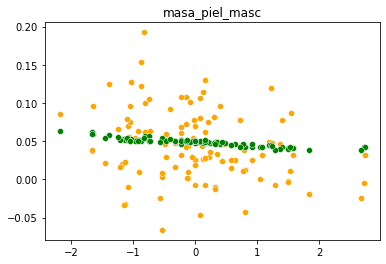

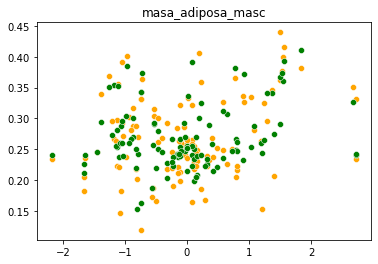

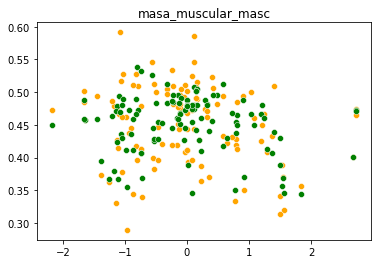

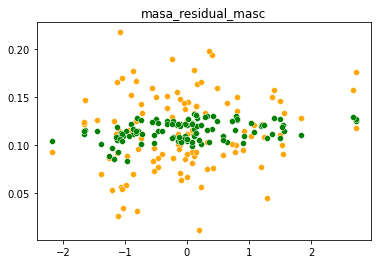

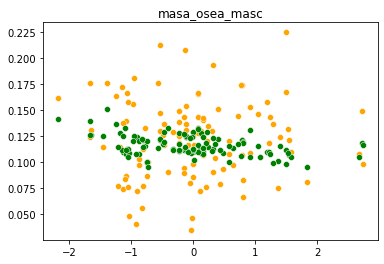

In [117]:
y_pred = model.predict(x_train_m)
for index,target in enumerate(y_columns):
    MSE = mean_squared_error(y_train_m[:,index],y_pred[:,index])
    MAE = mean_absolute_error(y_train_m[:,index],y_pred[:,index])
    R2 = r2_score(y_train_m[:,index],y_pred[:,index])
    print(f'{target}')
    print(f'R2 = {round(R2,4)} , MSE = {round(MSE,4)} and MAE = {round(MAE,4)}')
    plt.figure()
    #sns.scatterplot(x=y_train_m[:,index],y=y_pred, color='blue')
    sns.scatterplot(x=x_train_m[:,1],y=y_pred[:,index], color='orange')
    sns.scatterplot(x=x_train_m[:,1],y=y_train_m[:,index], color='green')
    plt.title(target+'_masc')
    print('-'*33)


masa_piel
R2 = -6.7432 , MSE = 0.0002 and MAE = 0.0113
---------------------------------
masa_adiposa
R2 = 0.1899 , MSE = 0.0026 and MAE = 0.0371
---------------------------------
masa_muscular
R2 = 0.0702 , MSE = 0.0019 and MAE = 0.032
---------------------------------
masa_residual
R2 = -2.2676 , MSE = 0.0003 and MAE = 0.0132
---------------------------------
masa_osea
R2 = -5.632 , MSE = 0.0006 and MAE = 0.02
---------------------------------


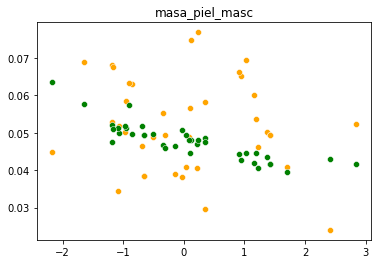

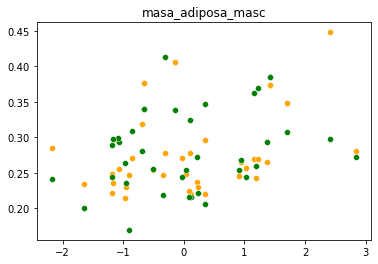

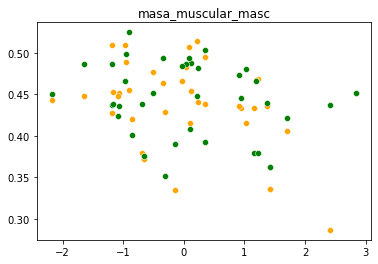

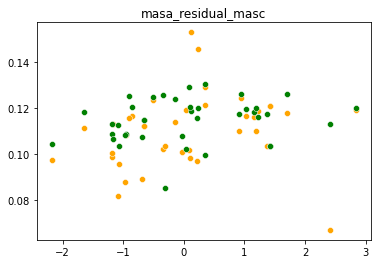

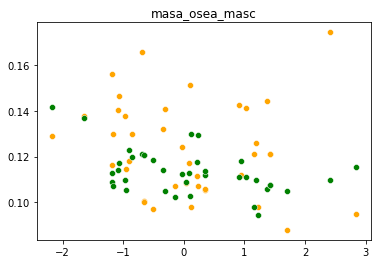

In [108]:
y_pred = model.predict(x_test_m)
for index,target in enumerate(y_columns):
    MSE = mean_squared_error(y_test_m[:,index],y_pred[:,index])
    MAE = mean_absolute_error(y_test_m[:,index],y_pred[:,index])
    R2 = r2_score(y_test_m[:,index],y_pred[:,index])
    print(f'{target}')
    print(f'R2 = {round(R2,4)} , MSE = {round(MSE,4)} and MAE = {round(MAE,4)}')
    plt.figure()
    #sns.scatterplot(x=y_test_m[:,index],y=y_pred, color='blue')
    sns.scatterplot(x=x_test_m[:,1],y=y_pred[:,index], color='orange')
    sns.scatterplot(x=x_test_m[:,1],y=y_test_m[:,index], color='green')
    plt.title(target+'_masc')
    print('-'*33)
